In [35]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
gsm = pd.read_csv('../../data_tables/gsm/DLBCL.699.163drivers.Sep_23_2022.tsv', sep='\t', index_col=0)
gsm = gsm.drop('classifier_name', axis=1)
samples = pd.read_csv('../../data_tables/sample_sets/ShippStaudtSets.purity0.2.txt', sep='\t', index_col=0)
samples = samples.loc[samples.index.isin(gsm.columns)]
staudt_samples = samples.loc[samples['cohort'] != 'Shipp'].index
shipp_samples = samples.loc[samples['cohort'] == 'Shipp'].index
staudt_samples
#freqs = (gsm != 0).sum(axis=1) / 699
#freqs

Index(['DLBCL10450', 'DLBCL10469', 'DLBCL10497', 'DLBCL10505', 'DLBCL10538',
       'DLBCL10544', 'DLBCL10545', 'DLBCL10547', 'DLBCL10552', 'DLBCL10868',
       ...
       'DLBCL11471', 'DLBCL11491', 'DLBCL11495', 'DLBCL11500', 'DLBCL11513',
       'DLBCL11514', 'DLBCL11581', 'DLBC_FF_A7CQ_TP_NB', 'DLBC_FF_A7CR_TP_NB',
       'DLBC_FF_A7CX_TP_NB'],
      dtype='object', name='SampleName', length=422)

In [34]:
staudt_freqs = (gsm[staudt_samples] != 0).sum(axis=1) / len(staudt_samples)
shipp_freqs = (gsm[shipp_samples] != 0).sum(axis=1) / len(shipp_samples)


0.11611374407582939

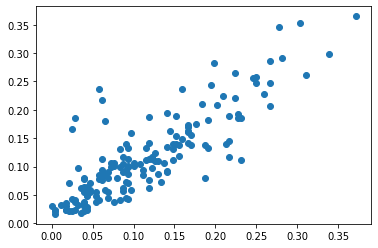

In [36]:
plt.scatter(shipp_freqs, staudt_freqs)

In [38]:
table_s1 = pd.read_csv('../../data_tables/tableS1_classifier_merged.tsv', sep='\t')
table_s1.columns

Index(['ID', 'order', 'MatchID', 'Gender', 'Cohort', 'COO',
       'Sample Preparation', 'Mean Target Coverage', 'Median Target Coverage',
       'Ploidy (ABSOLUTE)', 'Purity (ABSOLUTE)',
       'Pair Status (Tumor Only/Normal)', 'Number of Mutations',
       'Fraction Genome Deleted', 'Fraction Genome Amplified',
       'Number of Drivers - Mutations',
       'Number of Drivers - Non-Silent Mutations', 'Number of Drivers - SCNAs',
       'Number of Drivers - Amplifications', 'Number of Drivers - Deletions',
       'Number of Drivers - SVs', 'Number of WT Mutations (0)',
       'Number of WT SCNAs (0)', 'Number of WT Amplifications (0)',
       'Number of WT Deletions (0)', 'Number of WT SVs (0)',
       'Mutation Density', 'Mutation Density (Non Silent)',
       'Age-at first diagnosis', 'IPI_AGE', 'IPI_ECOG', 'IPI_STAGE', 'IPI_LDH',
       'IPI_EXBM', 'IPI', 'Biopsy Type', 'R-CHOp-like\nChemo', 'PFS-years',
       'PFS_STAT', 'OS.time', 'OS.status (1=dead)',
       'LymphGenClass [Sc

In [48]:
table_s1['R-CHOp-like\nChemo'].value_counts()

yes    455
no     227
Name: R-CHOp-like\nChemo, dtype: int64

In [49]:
table_s1['IPI'].value_counts()

1.0    155
2.0    136
3.0    116
0.0     73
4.0     41
5.0      7
Name: IPI, dtype: int64

In [50]:
table_s1['PFS_STAT'].value_counts()

0.0    249
1.0    198
Name: PFS_STAT, dtype: int64

In [53]:
table_s1.loc[:,['ID', 'PFS_STAT']]

,ID,PFS_STAT
0,DLBCL_C_D_1128_NULLPAIR,0.0
1,DLBCL_C_D_1156_NULLPAIR,0.0
2,DLBCL11539,0.0
3,DLBCL10515,1.0
4,DLBCL10942,0.0
...,...,...
694,DLBCL_LS3499,NaN
695,DFCIDL008_DT,NaN
696,DLBCL_C_D_1163_NULLPAIR,NaN
697,DFCIDL004_DT,NaN


In [46]:
table_s1.loc[(table_s1['IPI'] >= 0) & (table_s1['R-CHOp-like\nChemo'] == 'yes') & (table_s1['PFS_STAT'] == 1)]


,ID,order,MatchID,Gender,Cohort,COO,Sample Preparation,Mean Target Coverage,Median Target Coverage,Ploidy (ABSOLUTE),...,PredictedCluster,Confidence,Above90,Above85,Above80,Top70 Perc. Confident,Staudt Only Cluster,Shipp Only Cluster,OriginalCluster [chapuy et al Nature Med 2018],downsample_status
6,DLBCL10482,57,DLBCL10482,M,Schmitz et al.,ABC,Frozen,115.223350,108.0,2.110000,...,1.0,0.834425,False,True,True,True,1.0,NaN,NaN,NaN
16,DLBCL_RICOVER_1144,75,DLBCL-RICOVER_1144,M,Chapuy et al.,ABC,FFPE,148.222222,120.5,1.955336,...,1.0,0.968178,True,True,True,True,NaN,1.0,1.0,NaN
18,DLBCL_MC_F648_JKW,76,DLBCL-MC_F648_JKW,F,Chapuy et al.,ABC,Frozen,71.754545,60.0,2.047978,...,1.0,0.787352,False,False,False,True,NaN,1.0,1.0,NaN
23,DLBCL10945,49,DLBCL10945,F,Schmitz et al.,ABC,Frozen,179.957529,156.0,2.050000,...,1.0,0.956243,True,True,True,True,1.0,NaN,NaN,NaN
28,DLBCL11488,60,DLBCL11488,F,Schmitz et al.,ABC,Frozen,138.237838,122.0,1.990000,...,1.0,0.776982,False,False,False,True,1.0,NaN,NaN,ABC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,DLBCL_RICOVER_1219,626,DLBCL-RICOVER_1219,F,Chapuy et al.,ABC,FFPE,75.825758,63.5,2.070000,...,5.0,0.987274,True,True,True,True,NaN,5.0,5.0,NaN
658,DLBCL_LS2596,685,DLBCL-LS2596,F,Chapuy et al.,ABC,Frozen,70.655914,55.0,2.040000,...,5.0,0.982586,True,True,True,True,NaN,5.0,5.0,NaN
659,DLBCL10463,551,DLBCL10463,M,Schmitz et al.,ABC,Frozen,136.465798,123.0,2.040400,...,5.0,0.931953,True,True,True,True,2.0,NaN,NaN,NaN
661,DLBCL10485,578,DLBCL10485,M,Schmitz et al.,Unclass,Frozen,93.954357,85.0,4.050000,...,5.0,0.870597,False,True,True,True,5.0,NaN,NaN,NaN


In [12]:
natmed_gsm = pd.read_csv("../../data_tables/gsm/DLBCL_significant_event_matrix_NatMed.txt", sep='\t', index_col=0)
natmed_gsm.index = natmed_gsm.index.str.replace(':', '.').str.replace('-', '.').str.upper()
natmed_gsm.index = ['X' + x if '.AMP' in x or '.DEL' in x else x for x in natmed_gsm.index]
natmed_gsm

,DFCIDL001_DT,DFCIDL002_DT,DFCIDL003_DT,DFCIDL004_DT,DFCIDL007_DT,DFCIDL008_DT,DFCIDL009_DT,DFCIDL010_DT,DLBCL_BWH_DLBCL64,DLBCL_c_D_1103_nullpair,...,DLBCL_RICOVER_866,DLBCL_RICOVER_910,DLBCL_RICOVER_945,DLBCL_RICOVER_948,DLBCL_RICOVER_950,DLBCL_RICOVER_956,DLBCL_RICOVER_977,DLBCL_RICOVER_978,DLBCL_RICOVER_985,DLBCL_RICOVER_99
ACTB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2,0,0
B2M,2,0,0,0,0,0,0,2,0,0,...,0,0,2,0,0,0,0,0,0,0
BCL10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
BCL11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
BCL2,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SV.MYC,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SV.CD274/PDCD1LG2,3,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SV.TBL1XR1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SV.CIITA,3,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
clus_gsm = pd.read_csv("../../data_tables/gsm/DLBCL.699.fullGSM.Sep_23_2022.CLUSTERING.tsv", sep='\t', index_col=0)
clus_gsm

,DLBCL11470,DLBCL10900,DLBC_FF_A7CQ_TP_NB,DLBCL10462,DLBCL_RICOVER_1081,DLBCL_LS1098,DLBCL_RICOVER_299,DLBCL11558,DLBCL_C_D_1105_NULLPAIR,DLBCL11447,...,DLBCL11455,DLBCL_RICOVER_685,DLBCL_LS146,DLBCL_RICOVER_111,DLBCL_RICOVER_173,DLBCL11515,DLBCL10491,DLBCL_RICOVER_1046,DLBCL10547,DLBCL10998
gene,,,,,,,,,,,,,,,,,,,,,
STAT3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BCL11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PIM1,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
DTX1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NLRP8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19P13.2.DEL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SV.BCL2,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
SV.BCL6,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
[x for x in natmed_gsm.index if x not in clus_gsm.index]

['HIST1H2BK',
 'HIST2H2BE',
 'PDE4DIP',
 'X18Q21.33(BCL2).AMP',
 'SV.TP63',
 'SV.CD274/PDCD1LG2',
 'SV.TBL1XR1',
 'SV.CIITA',
 'SV.ETV6']

In [17]:
amps = [x for x in clus_gsm.index if '.AMP' in x]
dels = [x for x in clus_gsm.index if '.DEL' in x]
svs = [x for x in clus_gsm.index if 'SV.' in x]
muts = [x for x in clus_gsm.index if x not in amps and x not in dels and x not in svs]

In [18]:
len(amps), len(dels), len(svs), len(muts)

(32, 33, 3, 82)

In [19]:
sum([len(amps), len(dels), len(svs), len(muts)])

150

In [21]:
full_gsm = pd.read_csv('../../data_tables/gsm/DLBCL.699.fullGSM.Sep_23_2022.tsv', sep='\t', index_col=0)
full_gsm = full_gsm.loc[~full_gsm.index.str.contains('.CCF')]
full_gsm

,DLBCL11470,DLBCL10900,DLBC_FF_A7CQ_TP_NB,DLBCL10462,DLBCL_RICOVER_1081,DLBCL_LS1098,DLBCL_RICOVER_299,DLBCL11558,DLBCL_C_D_1105_NULLPAIR,DLBCL11447,...,DLBCL11455,DLBCL_RICOVER_685,DLBCL_LS146,DLBCL_RICOVER_111,DLBCL_RICOVER_173,DLBCL11515,DLBCL10491,DLBCL_RICOVER_1046,DLBCL10547,DLBCL10998
0,,,,,,,,,,,,,,,,,,,,,
STAT3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STK33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OSBPL10,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
BCL11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PIM1,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X19P13.2.DEL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0
SV.BCL2,0,0,0,0,0,3,3,3,0,0,...,0,0,0,0,0,0,0,3.0,0,0
SV.BCL6,3,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0


In [26]:
amps = [x for x in full_gsm.index if '.AMP' in x]
dels = [x for x in full_gsm.index if '.DEL' in x]
svs = [x for x in full_gsm.index if 'SV' in x]
muts = [x for x in full_gsm.index if x not in amps and x not in dels and x not in svs]
muts = [x for x in muts if x != 'COO' and x != 'PLOIDY' and x != 'PURITY']
len(amps), len(dels), len(svs), len(muts)

(34, 33, 3, 208)

In [27]:
208 + 34 + 33 + 3

278

In [28]:
qvals = pd.read_csv('../../data_tables/qval_dfs/fisher_exact_5x2.Sep_23_2022.combined.tsv', sep='\t')
qvals.loc[qvals['q'] <= 0.10]

,Unnamed: 0,cluster,q,p,overall_frequency,C1_nf,C2_nf,C3_nf,C4_nf,C5_nf,...,C3_wt,C4_mut,C4_wt,C5_mut,C5_wt,C1_sum,C2_sum,C3_sum,C4_sum,C5_sum
0,SV.BCL6,C1,0.000036,0.000010,0.216364,0.613445,0.176471,0.033613,0.092437,0.084034,...,91,11,64,10,129,219,63,12,33,30
1,DTX1,C1,0.000036,0.000010,0.170909,0.446809,0.106383,0.085106,0.202128,0.159574,...,87,19,56,15,124,78,17,13,34,26
2,CD70,C1,0.000036,0.000010,0.096364,0.716981,0.037736,0.037736,0.132075,0.075472,...,93,7,68,4,135,76,4,4,14,7
3,TNFAIP3,C1,0.000036,0.000010,0.129091,0.507042,0.070423,0.098592,0.197183,0.126761,...,88,14,61,9,130,72,10,13,28,18
4,NOTCH2,C1,0.000036,0.000010,0.083636,0.695652,0.108696,0.086957,0.021739,0.086957,...,91,1,74,4,135,64,10,7,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,X1Q32.1.AMP,C5,0.058165,0.032710,0.078182,0.093023,0.232558,0.162791,0.069767,0.441860,...,88,3,72,19,120,5,13,9,3,25
226,BCL11A,C5,0.065519,0.037440,0.058182,0.093750,0.156250,0.093750,0.250000,0.406250,...,92,8,67,13,126,6,8,5,15,23
227,IRF4,C5,0.069816,0.040420,0.078182,0.139535,0.232558,0.139535,0.046512,0.441860,...,89,2,73,19,120,11,19,10,3,32
228,LYN,C5,0.079109,0.046990,0.034545,0.368421,0.157895,0.052632,0.000000,0.421053,...,94,0,75,8,131,14,5,2,0,16
